In [2]:
from Bio import Phylo
from io import StringIO

In [3]:
treedata = '((2[&type="dormant"]:1.8538)5[&type="active"]:0.014478,(((1[&type="active"]:0.069495,0[&type="active"]:0.069495)3[&type="active"]:1.04667)4[&type="dormant"]:0.03647)6[&type="active"]:0.715642)7[&type="active"]:0;'
handle = StringIO(treedata)
tree = Phylo.read(handle, 'newick', rooted=True)

In [4]:
tree.clade.clades[0]

Clade(branch_length=0.014478, comment='&type="active"', confidence=5)

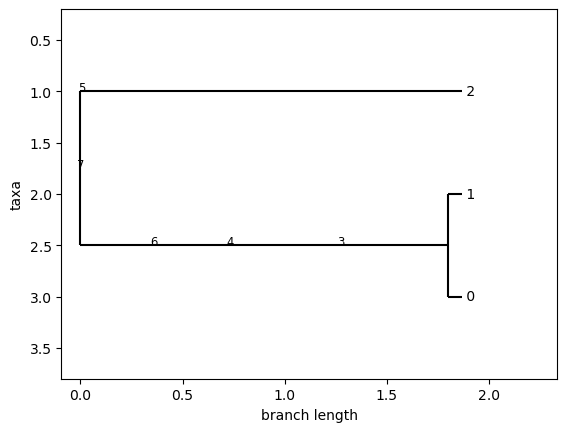

In [5]:
Phylo.draw(tree)

In [6]:
tree.clade

Clade(branch_length=0.0, comment='&type="active"', confidence=7)

In [7]:
def conf_to_names (tree):
  clades = [tree.clade]
  while (clades):
    nxt = []
    for c in clades:
      if c.confidence and not c.name:
        c.name=str(c.confidence)
        c.confidence=None
        if c.clades:
          nxt += c.clades
    clades = nxt

In [8]:
conf_to_names(tree)

In [9]:
import numpy as np
from treetime.seqgen import SeqGen
from treetime import GTR
from treetime.gtr import avg_transition

In [10]:
pi = np.array([0.25, 0.25, 0.25, 0.25])
gtr = GTR.standard(model='hky', mu=1.0, pi=pi, kappa=0.1)
gtr_d = GTR.standard(model='hky', mu=0.1, pi=pi, kappa=0.1)

In [11]:
sq = SeqGen(10, tree=tree, gtr=gtr, gtr_d = gtr_d)
sq.evolve_sb()
# print(sq.aln)


0.00	-TreeAnc: set-up

0.00	-SequenceData: loaded alignment.


In [12]:
aln = sq.get_aln(True)
print(aln)

Alignment with 8 rows and 10 columns
AGGGCTCGCC 7
AGGGCTCGCC 5
ACGGCACGCC 2
AAGCCTCTGC 6
AAGCCTCTGC 4
AAACCGCGCA 3
AAACCGCGCA 1
AAACCGCGCA 0


In [15]:
for seqrecord in aln._records:
  print(seqrecord.id, seqrecord.seq)

7 AGGGCTCGCC
5 AGGGCTCGCC
2 ACGGCACGCC
6 AAGCCTCTGC
4 AAGCCTCTGC
3 AAACCGCGCA
1 AAACCGCGCA
0 AAACCGCGCA


In [46]:
def f(s, translate):
  map_ = {}
  pairs = translate.split('\n')
  for pair in pairs:
    one, two = pair.split(" ")
    x = one[-2:] if one[-2].isnumeric() else one[-1]
    y = two[:2] if two[1].isnumeric() else two[0]
    map_[x] = y
  
  pieces = s.split('[')
  new_pieces = []
  for p in pieces[:-1]:
    label = p[-2:] if p[-2].isnumeric() else p[-1]
    if label in map_:
      # p.replace(label + "[", map_[label])
      new_p = p[:-2] + p[-2:].replace(label, map_[label])
      new_pieces.append(new_p)
  
  new_pieces.append(pieces[-1])
  return '['.join(new_pieces)

In [47]:
s = '((((((((((((1[&type="active"]:0.16599002714973043)100[&type="dormant"]:10.173799388519845)101[&type="active"]:2.276310821314956,((((((((((((2[&type="active"]:0.025388792339026682,4[&type="active"]:0.025388792339026682)62[&type="active"]:0.5941671409446917)114[&type="dormant"]:2.026645447933379)115[&type="active"]:0.561259960227936,((3[&type="active"]:0.11701507141517559)102[&type="dormant"]:2.9169349242640443)103[&type="active"]:0.17351134576581373)56[&type="active"]:0.8790565299568316,(((((6[&type="active"]:0.019923819062094134,7[&type="active"]:0.019923819062094134)57[&type="active"]:0.28652392787552944,((8[&type="active"]:0.025637309118772395,9[&type="active"]:0.025637309118772395)60[&type="active"]:0.086084580249826,(10[&type="active"]:0.06976430372467131,(11[&type="active"]:0.004782900321498657,12[&type="active"]:0.004782900321498657)87[&type="active"]:0.06498140340317266)69[&type="active"]:0.041957585643927084)85[&type="active"]:0.19472585756902516)51[&type="active"]:0.4936322827751992)112[&type="dormant"]:2.8259484228467158)113[&type="active"]:0.20920473239318493,((((13[&type="active"]:0.17845966249530792,((14[&type="active"]:0.13844638249332902,22[&type="active"]:0.13844638249332902)54[&type="active"]:0.028418100336609936,(((19[&type="active"]:0.016867645492147833,20[&type="active"]:0.016867645492147833)84[&type="active"]:0.026695584693499457,(21[&type="active"]:0.016000183026256953,23[&type="active"]:0.016000183026256953)65[&type="active"]:0.027563047159390338)94[&type="active"]:0.011368388936150366,24[&type="active"]:0.054931619121797656)77[&type="active"]:0.1119328637081413)53[&type="active"]:0.011595179665368965)59[&type="active"]:0.03901681490887823,(((15[&type="active"]:0.06616911157679026,17[&type="active"]:0.06616911157679026)90[&type="active"]:0.0063205038776563,16[&type="active"]:0.07248961545444656)72[&type="active"]:0.028680853601451978,18[&type="active"]:0.10117046905589853)78[&type="active"]:0.11630600834828762)71[&type="active"]:0.15561143282893344)122[&type="dormant"]:3.197969504905397)123[&type="active"]:0.2641757698142069)96[&type="active"]:0.2512846864491416)89[&type="active"]:0.047925937724963674,((5[&type="active"]:0.10233726145429405)104[&type="dormant"]:4.022360994742425)105[&type="active"]:0.009745552930109369)97[&type="active"]:0.6701397014874422)150[&type="dormant"]:0.4804091579439227)151[&type="active"]:0.0974923611267764)152[&type="dormant"]:1.595648660224314)153[&type="active"]:3.5923891578057985)154[&type="dormant"]:1.4575520251174812)155[&type="active"]:0.5880253641519673)79[&type="active"]:0.1957772105466855)126[&type="dormant"]:8.871563043036929)127[&type="active"]:3.635447886438989)128[&type="dormant"]:0.30846453150962105)129[&type="active"]:3.0367343046975783)130[&type="dormant"]:3.8866153647452713)131[&type="active"]:1.2592906155665347)132[&type="dormant"]:0.3061367052083952)133[&type="active"]:0.5712360035937394,((((((((((((((((25[&type="active"]:0.03515026445478941,26[&type="active"]:0.03515026445478941)70[&type="active"]:0.04963750237330828)116[&type="dormant"]:1.1774578281629402)117[&type="active"]:0.03349695246506501)118[&type="dormant"]:1.341718372042516)119[&type="active"]:1.8694103819872807)120[&type="dormant"]:6.844226382613911)121[&type="active"]:0.08632002901285674,((((((((27[&type="active"]:0.06474854808005516)106[&type="dormant"]:4.892750267684851)107[&type="active"]:0.06767810100939542,(((((28[&type="active"]:0.006737097558295581,31[&type="active"]:0.006737097558295581)98[&type="active"]:0.012080280149077072,30[&type="active"]:0.018817377707372653)67[&type="active"]:0.09174984994532508,(29[&type="active"]:0.0404037958427322,32[&type="active"]:0.0404037958427322)68[&type="active"]:0.07016343180996554)81[&type="active"]:0.15514644293223945)138[&type="dormant"]:4.639401643951554)139[&type="active"]:0.12006160223781048)74[&type="active"]:1.2054247954503117,((((((33[&type="active"]:0.38818995681690344)108[&type="dormant"]:1.3922537961091854)109[&type="active"]:0.29064644267403916,(((34[&type="active"]:0.013838041926378459)110[&type="dormant"]:1.0635112293478837)111[&type="active"]:0.6896336558106373,(((35[&type="active"]:0.23705859761628653,36[&type="active"]:0.23705859761628653)75[&type="active"]:0.13967007733038797)124[&type="dormant"]:1.3423127237414783)125[&type="active"]:0.04794152839674659)66[&type="active"]:0.3041072685152286)61[&type="active"]:0.44416325592147254,((37[&type="active"]:0.4682812282337845,((38[&type="active"]:0.004213476056019107,41[&type="active"]:0.004213476056019107)58[&type="active"]:0.12385208850102333,(39[&type="active"]:0.012758382175203637,40[&type="active"]:0.012758382175203637)55[&type="active"]:0.11530718238183879)64[&type="active"]:0.34021566367674205)82[&type="active"]:0.32204067680682125,((42[&type="active"]:0.08808177969029174,43[&type="active"]:0.08808177969029174)73[&type="active"]:0.3087242116317447,((44[&type="active"]:0.10001957351917902,45[&type="active"]:0.10001957351917902)92[&type="active"]:0.18575970078074483,(((46[&type="active"]:0.06568632853276421,49[&type="active"]:0.06568632853276421)93[&type="active"]:0.023253405653210255,(48[&type="active"]:0.04510710122285069,50[&type="active"]:0.04510710122285069)83[&type="active"]:0.04383263296312377)63[&type="active"]:0.0878419709257124,47[&type="active"]:0.17678170511168687)86[&type="active"]:0.10899756918823697)88[&type="active"]:0.11102671702211259)52[&type="active"]:0.3935159137185693)76[&type="active"]:1.724931546480995)95[&type="active"]:0.10808663503394866)148[&type="dormant"]:2.7723915174692415)149[&type="active"]:0.834870108199822)80[&type="active"]:0.1172646990244468)134[&type="dormant"]:1.176189173958412)135[&type="active"]:0.20687375568790234)136[&type="dormant"]:3.1242488653252476)137[&type="active"]:0.5822395068920461)91[&type="active"]:0.6391695940324968)140[&type="dormant"]:3.4068516746001816)141[&type="active"]:0.019223222610529334)142[&type="dormant"]:6.774707114876513)143[&type="active"]:1.5233311554216087)144[&type="dormant"]:3.739953699619832)145[&type="active"]:2.10729899534892)146[&type="dormant"]:0.3732422728688789)147[&type="active"]:4.666170459836646)99[&type="active"]:0.0;'
translate = '''			1 12,
			2 44,
			3 30,
			4 1,
			5 2,
			6 42,
			7 6,
			8 46,
			9 43,
			10 36,
			11 23,
			12 29,
			13 26,
			14 14,
			15 18,
			16 7,
			17 39,
			18 17,
			19 10,
			20 25,
			21 31,
			22 33,
			23 22,
			24 47,
			25 41,
			26 37,
			27 5,
			28 3,
			29 35,
			30 8,
			31 49,
			32 34,
			33 16,
			34 9,
			35 11,
			36 45,
			37 24,
			38 20,
			39 21,
			40 38,
			41 28,
			42 48,
			43 13,
			44 32,
			45 0,
			46 27,
			47 40,
			48 15,
			49 4,
			50 19'''

In [54]:
t = f(s, translate)
t.count(")")

0

In [53]:
ss = s.split('[')
ss

['((((((((((((1',
 '&type="active"]:0.16599002714973043)100',
 '&type="dormant"]:10.173799388519845)101',
 '&type="active"]:2.276310821314956,((((((((((((2',
 '&type="active"]:0.025388792339026682,4',
 '&type="active"]:0.025388792339026682)62',
 '&type="active"]:0.5941671409446917)114',
 '&type="dormant"]:2.026645447933379)115',
 '&type="active"]:0.561259960227936,((3',
 '&type="active"]:0.11701507141517559)102',
 '&type="dormant"]:2.9169349242640443)103',
 '&type="active"]:0.17351134576581373)56',
 '&type="active"]:0.8790565299568316,(((((6',
 '&type="active"]:0.019923819062094134,7',
 '&type="active"]:0.019923819062094134)57',
 '&type="active"]:0.28652392787552944,((8',
 '&type="active"]:0.025637309118772395,9',
 '&type="active"]:0.025637309118772395)60',
 '&type="active"]:0.086084580249826,(10',
 '&type="active"]:0.06976430372467131,(11',
 '&type="active"]:0.004782900321498657,12',
 '&type="active"]:0.004782900321498657)87',
 '&type="active"]:0.06498140340317266)69',
 '&type="active